In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import gmaps
from scipy import stats
from pprint import pprint
from config import openWeatherKey
from config import hehe
gmaps.configure(api_key=hehe)

In [2]:
weatherDisasterCSV = "Resources/disaster_data.csv"
coordCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterCSV)
desiredColumns = ["Dis No", "Year", "Seq", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", "Disaster Subsubtype", "Entry Criteria", "ISO", "Location", "Start Month", "End Month", "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "CPI"]
wDisaster_df = wDisaster_df.loc[wDisaster_df["ISO"] == "USA", desiredColumns]
wDisaster_df
pd.options.display.max_rows = 10

In [3]:
wDisaster_df

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
2,2000-0080-USA,2000,80,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Kentucky, Ohio provinces",2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Morris, Sussex districts (New Jersey province)",8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Meteorological,Storm,NaN,NaN,SigDam,USA,"Alabama, Georgia, Louisiana, North Carolina, S...",1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
5,2000-9712-USA,2000,9712,Climatological,Drought,Drought,NaN,Affected,USA,Wyoming province,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
6,2000-0838-USA,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,Kill,USA,"Texas, Oklahoma, New Mexico, Arkansas, Missour...",12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019-0307-USA,2019,307,Hydrological,Flood,NaN,NaN,Affected,USA,"Lincolnton region (Lincoln County, North Carol...",6,6.0,3.0,NaN,600.0,NaN,600.0,NaN,NaN,100.000000
533,2020-0148-USA,2020,148,Meteorological,Storm,Convective storm,Tornado,Kill,USA,"Louisiana, Texas, Mississippi, South Carolina,...",4,4.0,38.0,200.0,NaN,NaN,200.0,NaN,1000000.0,NaN
534,2020-0011-USA,2020,11,Meteorological,Storm,Convective storm,Severe storm,Kill,USA,"Texas, Oklahoma, Missouri, Arkansas, Louisiana...",1,1.0,12.0,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
535,2020-0082-USA,2020,82,Meteorological,Storm,Convective storm,Tornado,Waiting,USA,"Nashville (Tennessee), Kentucky, Missouri, Mis...",3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN


In [4]:
newData = {
    "Location": [],
    "Dis No": []
}

for index, row in wDisaster_df.iterrows():
    #print(type(newData["Location"]))
    if type(row["Location"]) is str:
        for location in row["Location"].split(","):
            newData["Location"].append(location)
            newData["Dis No"].append(row["Dis No"])
splitLocations_df = pd.DataFrame(newData)
splitLocations_df["Location"].value_counts()

 Missouri                           80
 Kansas                             77
 Oklahoma                           60
 Indiana                            59
 Mississippi                        58
                                    ..
 Hidalgo                             1
Watkins area (Adams district         1
 Alachua areas (Alachua district     1
 Blount                              1
 South Florida                       1
Name: Location, Length: 1415, dtype: int64

In [5]:
print(wDisaster_df.columns)
wDisaster_df.groupby("Disaster Type").count()

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Entry Criteria', 'ISO',
       'Location', 'Start Month', 'End Month', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')


,Dis No,Year,Seq,Disaster Subgroup,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Disaster Type,,,,,,,,,,,,,,,,,,,
Drought,11,11,11,11,11,0,11,11,11,11,8,0,0,0,0,0,3,9,11
Earthquake,9,9,9,9,9,0,9,9,9,9,9,3,7,7,2,9,4,8,9
Epidemic,3,3,3,3,2,0,3,3,2,3,3,1,0,3,0,3,0,0,3
Extreme temperature,13,13,13,13,13,2,13,13,13,13,13,12,1,0,0,1,3,3,13
Flood,94,94,94,94,79,0,93,94,94,94,94,70,7,69,5,73,22,54,94
Landslide,3,3,3,3,3,0,3,3,3,3,3,3,2,1,1,3,0,2,3
Storm,278,278,278,278,258,203,278,278,278,278,278,238,102,86,29,155,175,224,274
Volcanic activity,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1
Wildfire,62,62,62,62,52,0,62,62,62,62,62,32,22,26,40,54,17,42,62


In [6]:
splitLocations_df["Lat"] = ""
splitLocations_df["Long"] = ""
locations = splitLocations_df["Location"]
splitLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,,
1,Ohio provinces,2000-0080-USA,,
2,Morris,2000-0500-USA,,
3,Sussex districts (New Jersey province),2000-0500-USA,,
4,Alabama,2000-0919-USA,,
...,...,...,...,...
4019,Georgia,2020-0082-USA,,
4020,Texas,2020-0082-USA,,
4021,errebonne,2020-0219-USA,,
4022,Plaquemines,2020-0219-USA,,


In [7]:
coordLocations_df = pd.read_csv(coordCSV)
coordLocations_df = coordLocations_df.loc[:, ["Location", "Dis No", "Lat", "Long"]]
coordLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,34.61,-92.66
1,Morris,2000-0500-USA,40.83,-74.53
2,Alabama,2000-0919-USA,32.75,-86.75
3,Georgia,2000-0919-USA,32.75,-83.50
4,Louisiana,2000-0919-USA,31.00,-92.00
...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66
2857,Missouri,2020-0082-USA,38.25,-92.50
2858,Mississippi,2020-0082-USA,32.75,-89.75
2859,Georgia,2020-0082-USA,32.75,-83.50


In [8]:
combinedData = pd.merge(coordLocations_df, wDisaster_df, on="Dis No", how="outer")
combinedData = combinedData.iloc[range(0,2861), :].rename(columns={"Location_x": "Location"})
combinedData

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Kentucky,2000-0080-USA,34.61,-92.66,2000,80,Hydrological,Flood,Riverine flood,NaN,...,2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
1,Morris,2000-0500-USA,40.83,-74.53,2000,500,Hydrological,Flood,Riverine flood,NaN,...,8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
2,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
3,Georgia,2000-0919-USA,32.75,-83.50,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
4,Louisiana,2000-0919-USA,31.00,-92.00,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2857,Missouri,2020-0082-USA,38.25,-92.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2858,Mississippi,2020-0082-USA,32.75,-89.75,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2859,Georgia,2020-0082-USA,32.75,-83.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN


In [9]:
thirdQuintant = combinedData.loc[(combinedData["Long"] < -90) & (combinedData["Long"] > -105), :]
areasAffected = len(thirdQuintant["Location"].unique())

# # Ignore this code
# thirdQuintantNorth = thirdQuintant.loc[thirdQuintant["Lat"] > 40, :].reset_index(drop=True)
# thirdQuintantSouth = thirdQuintant.loc[thirdQuintant["Lat"] < 40, :].reset_index(drop=True)
# northAreasAffected = len(thirdQuintantNorth["Location"].unique())
# southAreasAffected = len(thirdQuintantSouth["Location"].unique())

In [10]:
#Creating a trimmed DF of dropped duplicates for more accurate calculations
uniqueDisNo_df = thirdQuintant.drop_duplicates(subset="Dis No", keep="first")
#My regions unique DF for plotting
uniqueThirdQuintant = uniqueDisNo_df.loc[(uniqueDisNo_df["Long"] < -90) & (uniqueDisNo_df["Long"] > -105), :]

# #Ignore this code
# uniqueThirdQuintantNorth = uniqueDisNo_df.loc[uniqueDisNo_df["Lat"] > 40, :].reset_index(drop=True)
# uniqueThirdQuintantSouth = uniqueDisNo_df.loc[uniqueDisNo_df["Lat"] < 40, :].reset_index(drop=True)


# uniqueNorthAreasAffected = len(uniqueThirdQuintantNorth["Location"].unique())
# uniqueSouthAreasAffected = len(uniqueThirdQuintantNorth["Location"].unique())
uniqueThirdQuintant

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Kentucky,2000-0080-USA,34.61,-92.66,2000,80,Hydrological,Flood,Riverine flood,NaN,...,2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
4,Louisiana,2000-0919-USA,31.00,-92.00,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
11,Texas,2000-0838-USA,31.25,-99.25,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
16,Crittenden,2000-0021-USA,35.23,-90.28,2000,21,Meteorological,Storm,Convective storm,Tornado,...,1,1.0,1.0,12.0,NaN,150.0,162.0,200500.0,210000.0,67.355759
19,Mitchell,2000-0067-USA,43.71,-98.03,2000,67,Meteorological,Storm,Convective storm,Tornado,...,2,2.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,Texas,2019-0484-USA,31.25,-99.25,2019,484,Meteorological,Storm,Convective storm,Severe storm,...,10,10.0,4.0,NaN,NaN,NaN,NaN,2000000.0,2600000.0,100.000000
2826,Louisiana,2019-0335-USA,31.00,-92.00,2019,335,Meteorological,Storm,Tropical cyclone,NaN,...,7,7.0,1.0,NaN,NaN,NaN,NaN,300000.0,600000.0,100.000000
2838,Louisiana,2020-0148-USA,31.00,-92.00,2020,148,Meteorological,Storm,Convective storm,Tornado,...,4,4.0,38.0,200.0,NaN,NaN,200.0,NaN,1000000.0,NaN
2847,Texas,2020-0011-USA,31.25,-99.25,2020,11,Meteorological,Storm,Convective storm,Severe storm,...,1,1.0,12.0,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN


In [11]:
#Distaster subtypes value counts into variables to use in the future 
regionDisTypesCount = uniqueThirdQuintant["Disaster Type"].value_counts()
regionDisSubTypeCount = uniqueThirdQuintant["Disaster Subtype"].value_counts()

# #My region split into two. Ignore this code.
# northDisTypesCount = thirdQuintantNorth["Disaster Type"].value_counts()
# southhDisTypesCount = thirdQuintantSouth["Disaster Type"].value_counts()
# northDisTypesCount

In [12]:
#Print summary of total disaster count and areas affected
totalDisasterCount = len(uniqueThirdQuintant['Disaster Subtype'])
print(f"There were {totalDisasterCount} total distaters in the Midwest Region\nThere {areasAffected} total areas affected")

There were 232 total distaters in the Midwest Region
There 162 total areas affected


In [13]:
#DF for Occurances of Disaster SubTypes plot
regionalDisGroupby = uniqueThirdQuintant.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})

# #Ignore these two variables
# northDisGroupby = uniqueThirdQuintantNorth.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})
# southDisGroupby = uniqueThirdQuintantSouth.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})


In [14]:
regionalDisGroupby

Location  \
Disaster Type       Disaster Subtype                     
Drought             Drought                          5   
Epidemic            Viral disease                    2   
Extreme temperature Cold wave                        2   
                    Heat wave                        5   
                    Severe winter conditions         1   
...                                                ...   
Flood               Riverine flood                  28   
Storm               Convective storm               140   
                    Extra-tropical storm             1   
                    Tropical cyclone                19   
Wildfire            Forest fire                      7   

                                              Total Damages ('000 US$)  
Disaster Type       Disaster Subtype                                    
Drought             Drought                                 32400000.0  
Epidemic            Viral disease                                  0.0  
Extreme temperature Cold wave                                3600000.0  
                    Heat wave                                      0.0  
                    Severe winter conditions                  200000.0  
...                                                                ...  
Flood               Riverine flood                          29493000.0  
Storm               Convective storm                       165146570.0  
                    Extra-tropical storm                     1000000.0  
                    Tropical cyclone                       254429000.0  
Wildfire            Forest fire                              1300000.0  

[11 rows x 2 columns]

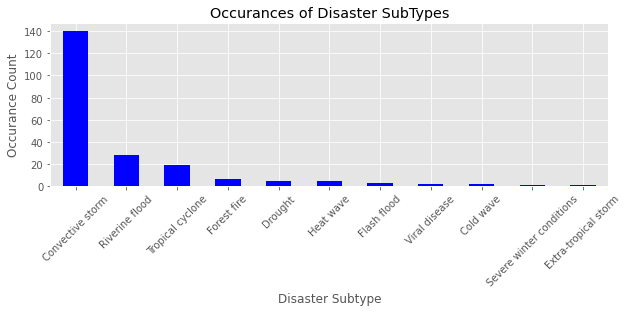

In [16]:
plt.figure(figsize=(10,3))

regionDisSubTypeCount.plot(kind="bar", facecolor="blue", rot=45)
plt.style.use('ggplot')
plt.title("Occurances of Disaster SubTypes")
plt.xlabel("Disaster Subtype")
plt.ylabel("Occurance Count")
plt.savefig("output-graphs/MWDisasterOccurances.png")

<Figure size 720x720 with 0 Axes>

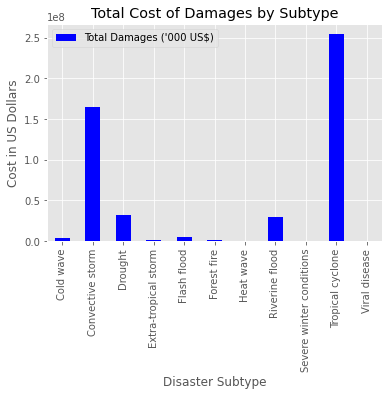

In [34]:
#Total damages by subtype
regionalDisGroupby1 = uniqueThirdQuintant.groupby("Disaster Subtype").agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})

plt.figure(figsize=(10,10))

regionalDisGroupby1.plot(kind="bar", facecolor="blue", y="Total Damages ('000 US$)", rot=90)
plt.title("Total Cost of Damages by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Cost in US Dollars")
plt.savefig("output-graphs/MWDisasterDamages.png")

In [18]:
regionalDisGroupbyNoAff = uniqueThirdQuintant.groupby(["Disaster Subtype"]).agg({"No Homeless": "sum", "Total Deaths": "sum", "No Affected": "sum","Total Affected": "sum"})
regionalDisGroupbyNoAff = regionalDisGroupbyNoAff.drop(index="Drought")

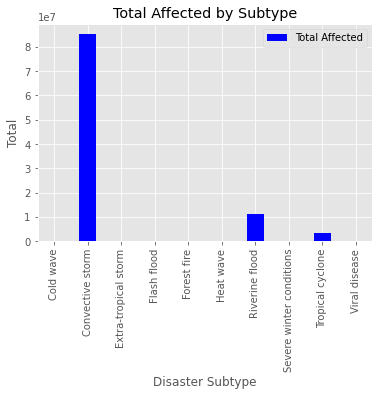

In [36]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["Total Affected"], rot=90, stacked=True, color={"blue": "Total Affected"})
plt.title("Total Affected by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Total")
plt.savefig("output-graphs/MWTotalAffected.png")

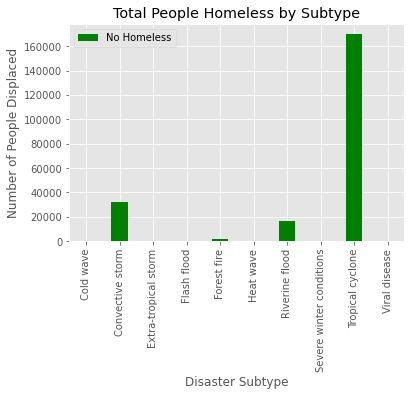

In [38]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["No Homeless"], rot=90, stacked=True, color={"green": "No Homeless"})
plt.title("Total People Homeless by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of People Displaced")
plt.savefig("output-graphs/MWNumberDisplaced.png")

Text(0, 0.5, 'Number of Deaths')

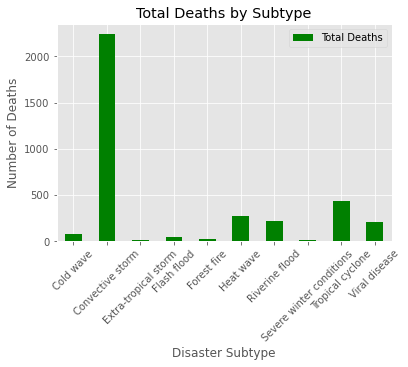

In [21]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["Total Deaths"], rot=45, stacked=True, color={"green": "Total Deaths"})
plt.title("Total Deaths by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of Deaths")

In [22]:
Yearly_TotalsRaw = uniqueThirdQuintant.groupby("Year").sum()
desiredColumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
Yearly_Totals = Yearly_TotalsRaw.loc[:, desiredColumns].reset_index(drop=False)
Yearly_Totals.rename(columns={"Insured Damages ('000 US$)" : "Insured Damages", "Total Damages ('000 US$)" : "Total Damages"}, inplace=True)
Yearly_CountRaw = uniqueThirdQuintant.groupby("Year").count()
Yearly_Count = Yearly_CountRaw.loc[:, "Dis No"].reset_index(drop=False)
YearlyMerged = pd.merge(Yearly_Count, Yearly_Totals, on='Year')
YearlyMerged.head()

,Year,Dis No,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages,Total Damages
0,2000,12,138.0,146.0,17149.0,3165.0,20460.0,681000.0,2917500.0
1,2001,7,103.0,18.0,107240.0,70048.0,177306.0,3500000.0,6036000.0
2,2002,16,405.0,266.0,165102.0,351.0,165719.0,4653500.0,10551000.0
3,2003,11,146.0,421.0,2545.0,15186.0,18152.0,4972000.0,11884400.0
4,2004,9,155.0,57.0,43640.0,753.0,44450.0,21250000.0,36160170.0


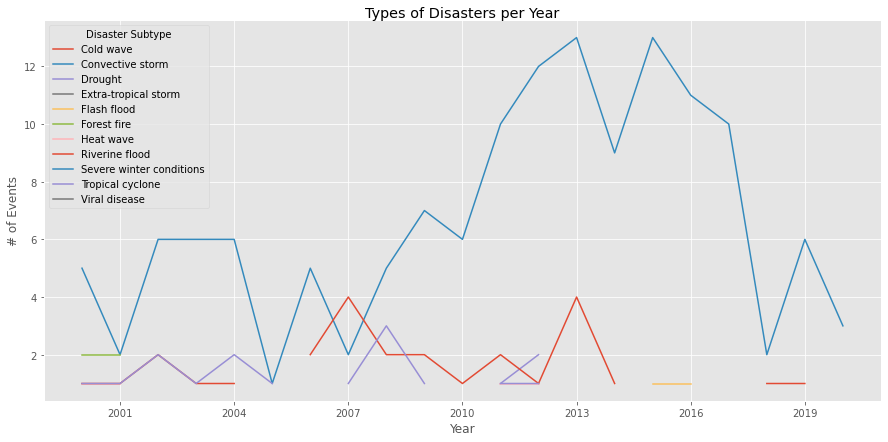

In [44]:
# Types of Disasters by Year
Types =  pd.DataFrame(uniqueThirdQuintant.groupby('Year')['Disaster Subtype'].value_counts())
df = Types
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
uniqueThirdQuintant.groupby('Year')['Disaster Subtype'].value_counts().unstack().plot(ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
plt.ylabel('# of Events')
# displaying the title
plt.title(label='Types of Disasters per Year',
          fontweight=10,
          pad='2.0')
plt.savefig("output-graphs/MWYearlyDisCountByYear.png")

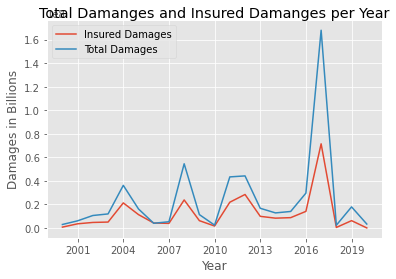

In [39]:
# Total Damanges and Insured Damanges per Year
PlotThis = ["Insured Damages","Total Damages"]
df = YearlyMerged
Damages = df.plot(kind="line",x="Year",y=PlotThis)
Damages.xaxis.set_major_locator(plt.MaxNLocator(8))
Damages.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.ylabel('Damages in Billions')  
  
# displaying the title 
plt.title(label='Total Damanges and Insured Damanges per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/MWYearlyDamages.png")

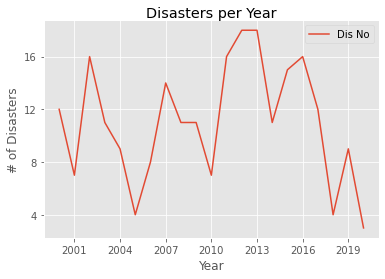

In [40]:
# Disasters per Year
PlotThis = ["Dis No"]
df = YearlyMerged
Homeless = df.plot(kind="line",x="Year",y=PlotThis)
Homeless.xaxis.set_major_locator(plt.MaxNLocator(8))
Homeless.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylabel('# of Disasters')  
  
# displaying the title 
plt.title(label='Disasters per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/MWYearlyDisasterCount.png")

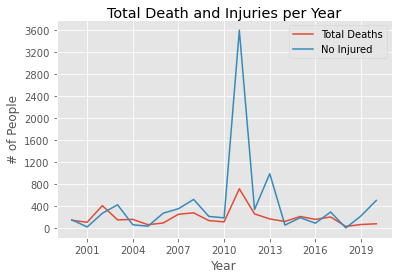

In [41]:
# Total Death and Injuries per Year
PlotThis = ["Total Deaths", "No Injured"]
df = YearlyMerged
DeathInjury = df.plot(kind="line",x="Year",y=PlotThis)
DeathInjury.xaxis.set_major_locator(plt.MaxNLocator(8))
DeathInjury.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='Total Death and Injuries per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/MWYearlyDeathCount.png")

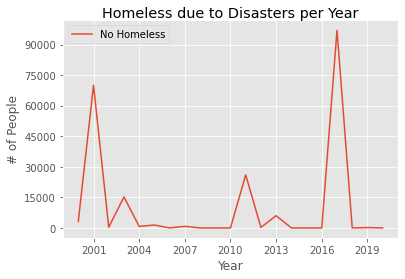

In [42]:
# Homeless due to Disasters per Year
PlotThis = ["No Homeless"]
df = YearlyMerged
Homeless = df.plot(kind="line",x="Year",y=PlotThis)
Homeless.xaxis.set_major_locator(plt.MaxNLocator(8))
Homeless.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='Homeless due to Disasters per Year',  
          fontweight=10,  
          pad='2.0')
plt.savefig("output-graphs/MWYearlyDisplacementCount.png")

In [27]:
locations = uniqueThirdQuintant[["Lat", "Long"]]
ratings = uniqueThirdQuintant["Total Damages ('000 US$)"].astype(float)
max_damages = max(uniqueThirdQuintant["Total Damages ('000 US$)"].fillna(0))
print(max_damages)

95000000.0


In [28]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = ratings, dissipating=False, max_intensity=max_damages,
                                 point_radius=1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
year_list = uniqueThirdQuintant["Year"].unique()
yearly_max_dam = []
for year in year_list:
    yearly_df = uniqueThirdQuintant.loc[uniqueThirdQuintant["Year"] == year, ["Total Damages ('000 US$)"]].fillna(0)
    max_dam = max(yearly_df["Total Damages ('000 US$)"])
    yearly_max_dam.append(max_dam)

In [30]:
trimmed_year_df = uniqueThirdQuintant.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
# trimmed_year_df = max(trimmed_year_df[trimmed_year_df["Total Damages ('000 US$)"]])
trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df["Max Dam"]= yearly_max_dam
trimmed_year_df

,Total Damages ('000 US$),Max Dam
Year,,
2000,1100000.0,1100000.0
2001,6000000.0,6000000.0
2002,3300000.0,3300000.0
2003,5000000.0,5000000.0
2004,18000000.0,18000000.0
...,...,...
2016,10000000.0,10000000.0
2017,95000000.0,95000000.0
2018,1500000.0,1500000.0


In [31]:
maxdamage_latlong_df = pd.merge(trimmed_year_df,uniqueThirdQuintant, on=["Year","Total Damages ('000 US$)"], how="left")
maxdamage_latlong_df = maxdamage_latlong_df[["Year","Total Damages ('000 US$)","Location","Dis No","Lat","Long"]]

locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])

In [32]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = ratings, dissipating=False, max_intensity=10000000,point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
info_box_content = """
<dl>
<dt>Year</dt><dd>{Year}</dd>
<dt>Disaster Number</dt><dd>{Dis No}</dd>
<dt>Total Damages</dt><dd>{Total Damages ('000 US$)}</dd>
</dl>
"""
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
locations1 = maxdamage_latlong_df[["Lat", "Long"]]
#Add marker to heat map
markers = gmaps.marker_layer(locations1,info_box_content=year_info)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
print("The End")

The End
